In [1]:
import numpy as np
import plot_tools as pt
import matplotlib.pylab as plt

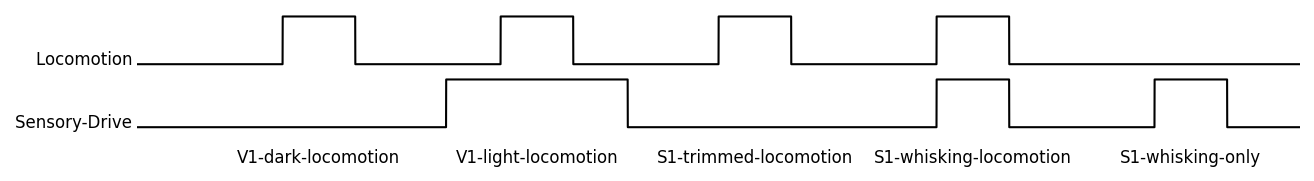

In [2]:
props = {
    'episode':600, # in ms
    'V1-dark-locomotion':{'t0_SD':0, # in ms
                          'amp_SD':0, # in Hz
                          'duration_SD':0, # in ms
                          't0_Loc': 200, # in ms
                          'amp_Loc':10, # in Hz
                          'duration_Loc':200},
    'V1-light-locomotion':{'t0_SD':50, # in ms
                          'amp_SD':5, # in Hz
                          'duration_SD':500, # in ms
                          't0_Loc': 200, # in ms
                          'amp_Loc':10, # in Hz
                          'duration_Loc':200},
    'S1-trimmed-locomotion':{'t0_SD':0, # in ms
                             'amp_SD':0, # in Hz
                             'duration_SD':0, # in ms
                             't0_Loc': 200, # in ms
                             'amp_Loc':10, # in Hz
                             'duration_Loc':200},
    'S1-whisking-locomotion':{'t0_SD':200, # in ms
                              'amp_SD':5, # in Hz
                              'duration_SD':200, # in ms
                              't0_Loc': 200, # in ms
                              'amp_Loc':10, # in Hz
                              'duration_Loc':200},
    'S1-whisking-only':{'t0_SD':200, # in ms
                              'amp_SD':5, # in Hz
                              'duration_SD':200, # in ms
                              't0_Loc': 0, # in ms
                              'amp_Loc':0, # in Hz
                              'duration_Loc':0},
}
    
    
                          
                          
def build_arrays(props,
                 dt=0.1,
                 pre_time = 200,
                 time_factor=1):
    Nep = len(props.keys())-1
    tfull = pre_time+Nep*props['episode']
    t = np.arange(int(tfull/dt))*dt
    SD, Loc = 0*t, 0*t
    for i, episode in enumerate(list(props.keys())[1:]):
        for key, array in zip(['SD', 'Loc'], [SD, Loc]):
            t0 = pre_time+i*props['episode']+props[episode]['t0_%s'%key]
            tend = t0+props[episode]['duration_%s'%key]
            array[(t>t0) & (t<tend)] = props[episode]['amp_%s'%key]
    return t, SD, Loc

pre_time = 200
t, SD, Loc = build_arrays(props)
fig, AX = plt.subplots(2, 1, figsize=(10,1))
AX[1].plot(t, SD, 'k-')
AX[0].plot(t, Loc, 'k-')
for ax, label, key in zip(AX, ['Locomotion', 'Sensory-Drive'], ['SD', 'Loc']):
    ax.axis('off')
    ax.set_xlim([t[0],t[-1]])
    ax.annotate(label+' ', (0,0), ha='right')
for i, episode in enumerate(list(props.keys())[1:]):
    t0 = 200+i*props['episode']+props['episode']/2.
    AX[1].annotate('\n'+episode, (t0, 0), xycoords='data', va='top', ha='center')